## Official seaborn tutorial

[link](https://seaborn.pydata.org/tutorial.html)

### Visualizing statistical relationships

[link](https://seaborn.pydata.org/tutorial/relational.html)

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")


There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [6]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
sns.__version__

'0.9.0'

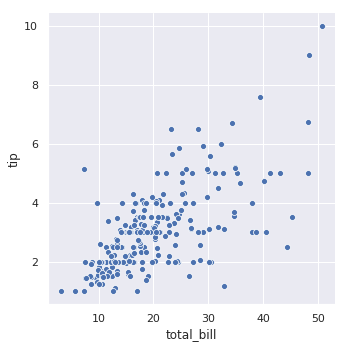

In [12]:
sns.relplot(x="total_bill", y="tip", data=tips, kind='scatter')


While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:



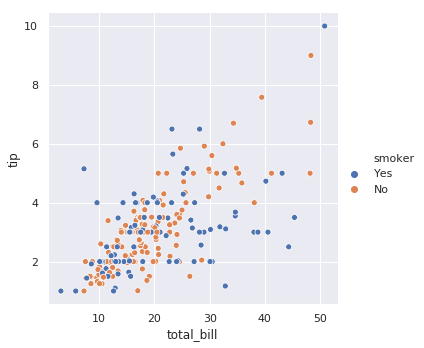

In [13]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

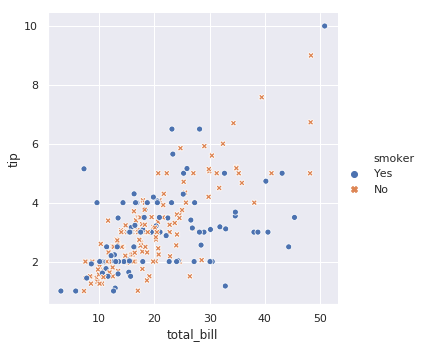

In [14]:
sns.relplot(x='total_bill', y='tip', hue='smoker', style='smoker', data=tips)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:



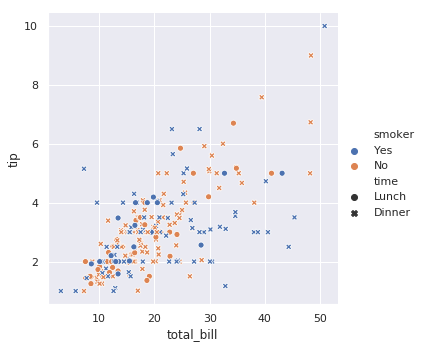

In [15]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:



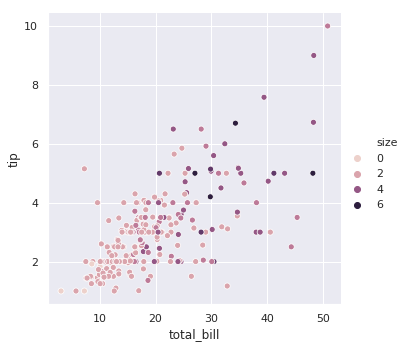

In [16]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);


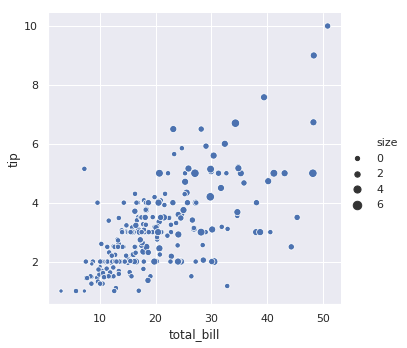

In [17]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);


Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

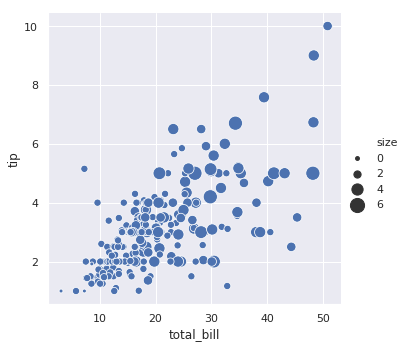

In [18]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);


### Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

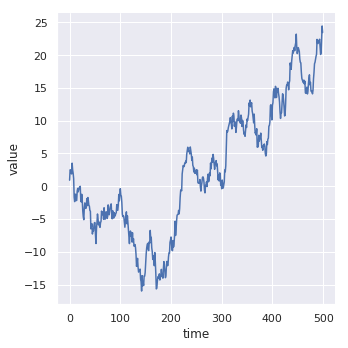

In [19]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)

g

Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:



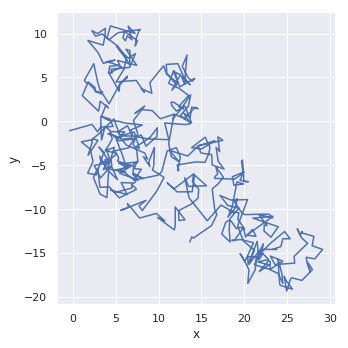

In [20]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x='x', y='y', data=df, sort = False, kind='line')